In [18]:
import numpy as np

def calc_posterior(mi, prior=0.5, prec = 100000):
    test_vals = [x / prec for x in range(1, prec)]
    max_t = None
    for t in test_vals:
        if t*np.log(t/prior)+(1-t)*np.log((1-t)/(1-prior)) <= mi:
            if  max_t is None or t > max_t:
                max_t = t
    return max_t

def dp_epsilon_to_posterior_success(epsilon):
    return 1 - 1./(1+np.exp(epsilon))

def dp_ps_to_epsilon(ps):
    return np.log(ps / (1-ps))

In [19]:
mi_to_eps = {}
for mi in [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]:
    ps = calc_posterior(mi)
    mi_to_eps[mi] = dp_ps_to_epsilon(ps)

In [20]:
q4_results = {"1-URGENT": 10594,
"2-HIGH": 10476,
"3-MEDIUM": 10410,
"4-NOT SPECIFIED": 10556,
"5-LOW": 10487}


# o_orderpriority,order_count
# 1-URGENT,10594
# 2-HIGH,10476
# 3-MEDIUM,10410
# 4-NOT SPECIFIED,10556
# 5-LOW,10487


In [21]:
results = {}
mi_range = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]
for key in q4_results:
    results[key] = []
    true_count = q4_results[key]
    for mi in mi_range:
        eps = mi_to_eps[mi]
        count_results = []
        for _ in range(1000):
            scale = 41. / eps  # Scale parameter for Laplace noise
            noise = np.random.laplace(loc=0, scale=scale)
            count_result = true_count + noise
            count_results.append(count_result)
        rel_error = np.average(
                        [100*abs(
                            count_results[i] - true_count
                            ) / true_count for i in range(len(count_results))]
                    )
        results[key].append(rel_error)

In [22]:
results

{'1-URGENT': [1.5194296720479534,
  1.094468236658718,
  0.7677982123826405,
  0.5233617997164477,
  0.3740499402311892,
  0.24066195120478603,
  0.13190727953998826,
  0.033733693081375485,
  0.03181246362725816,
  0.0344590906150468],
 '2-HIGH': [1.4984674508752356,
  1.0543596964080473,
  0.7685002937899762,
  0.5333070177194006,
  0.34200341751368196,
  0.23019289798861586,
  0.13277080103935632,
  0.033749758599309045,
  0.032291904751306416,
  0.03538837280466953],
 '3-MEDIUM': [1.538285365138232,
  1.0933034034353346,
  0.7681120431906947,
  0.5309749899030749,
  0.35899898587737816,
  0.24141832312979533,
  0.13643669208672518,
  0.03545123028900187,
  0.03509203989165155,
  0.03475905594119786],
 '4-NOT SPECIFIED': [1.5608087226160874,
  1.1484897350449714,
  0.7322571696923756,
  0.5325028527706469,
  0.3440538720575913,
  0.23102782622316567,
  0.1282993532906053,
  0.031585530688739774,
  0.03278226378285262,
  0.033871386168238975],
 '5-LOW': [1.552337699710857,
  1.130374

In [23]:
q12_results = {
    ("MAIL", "high"): 6202,
    ("MAIL", "low"): 9324,
    ("SHIP", "high"): 6200,
    ("SHIP", "low"): 9262
}
# l_shipmode,high_line_count,low_line_count
# MAIL,6202,9324
# SHIP,6200,9262


In [24]:
num_items_per_customer = 178.

In [25]:
results = {}
mi_range = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]
for key in q12_results:
    results[key] = []
    true_count = q12_results[key]
    for mi in mi_range:
        eps = mi_to_eps[mi]
        count_results = []
        for _ in range(1000):
            scale = num_items_per_customer / eps  # Scale parameter for Laplace noise
            noise = np.random.laplace(loc=0, scale=scale)
            count_result = true_count + noise
            count_results.append(count_result)
        rel_error = np.average(
                        [100*abs(
                            count_results[i] - true_count
                            ) / true_count for i in range(len(count_results))]
                    )
        results[key].append(rel_error)

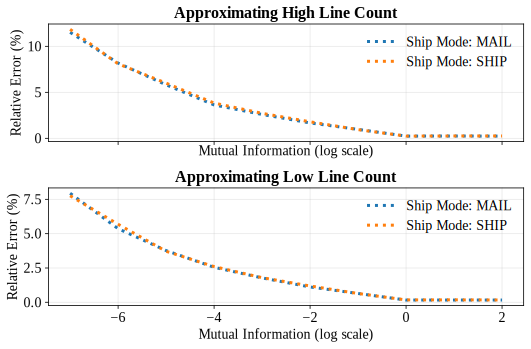

In [17]:
import polars.selectors as cs
import numpy as np

import polars as pl

import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib_inline.backend_inline

import matplotlib.pyplot as plt

LATEX = False
if LATEX:
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["font.serif"] = "Times"
else:
    mpl.rcParams['text.usetex'] = False
    mpl.rcParams["font.family"] = "Times New Roman"
    mpl.rcParams["mathtext.fontset"] = "stix"
    
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['savefig.dpi'] = 300

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

mpl.rcParams['axes.titleweight'] = 'bold'

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.frameon'] = False
fig, axes = plt.subplots(2, 1, figsize=(7.5, 5), sharex=True)
mi_range = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.0, 2.0, 4.0]
for ind, key in enumerate(['High', 'Low']):
    
    ax = axes[ind]

    for priority in ['MAIL', 'SHIP']:
        xs = [np.log2(x) for x in mi_range]
        y = results[(priority, key.lower())]
        ax.plot(xs, y, linestyle='dotted', linewidth=3,
            label=f'Ship Mode: {priority}'
        )

    ax.set_xlabel('Mutual Information (log scale)', fontsize=14)
    ax.set_ylabel(f'Relative Error (%)', fontsize=14)
    ax.set_title(f'Approximating {key} Line Count', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.legend(fontsize=14)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
#     plt.savefig('../figs/q12_dp.png', bbox_layout='tight')